## **Do stock price movements of major U.S. IT firms influence their financial sector?**

In [ ]:
import pandas as pd

# **Mounting Google Drive and accessing raw datafile:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Raw Dataset:**

In [ ]:
file_path = '/content/drive/MyDrive/stock_prices.csv'

try:
    df = pd.read_csv(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

,Unnamed: 0,tech,tech.1,tech.2,tech.3,finance,finance.1,finance.2,finance.3,pharma,...,food.2,food.3,education,education.1,education.2,education.3,energy,energy.1,energy.2,energy.3
0,NaN,MSFT,GOOGL,META,NVDA,JPM,BAC,MA,V,JNJ,...,SBUX,DPZ,UDMY,DUOL,COUR,CHGG,XOM,CVX,SHEL,NEE
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,37.15999984741211,27.85585594177246,54.709999084472656,0.39649999141693115,58.209999084472656,16.100000381469727,83.41400146484375,55.252498626708984,91.02999877929688,...,38.584999084472656,68.94000244140625,NaN,NaN,NaN,8.3100004196167,99.75,124.13999938964844,70.6500015258789,21.0625
3,2014-01-03,36.90999984741211,27.652652740478516,54.560001373291016,0.3917500078678131,58.65999984741211,16.40999984741211,83.08100128173828,55.290000915527344,91.8499984741211,...,38.474998474121094,68.9800033569336,NaN,NaN,NaN,8.210000038146973,99.51000213623047,124.3499984741211,70.77999877929688,21.09000015258789
4,2014-01-06,36.130001068115234,27.960960388183594,57.20000076293945,0.3970000147819519,59.0,16.65999984741211,82.66899871826172,54.95750045776367,92.33000183105469,...,38.084999084472656,69.0999984741211,NaN,NaN,NaN,8.260000228881836,99.66000366210938,124.0199966430664,70.30999755859375,21.100000381469727


# **Dividing the dataset according to sectors and stocks:**

In [ ]:
#Creating a Sector Map
sector_df = pd.read_csv(file_path, header=None, nrows=2)
sector_map = sector_df.T.drop(0)
sector_map.columns = ['Sector', 'Ticker']
sector_lookup = sector_map.set_index('Ticker')['Sector'].to_dict()

print("Sector Map Created")
print(f"JPM is in the '{sector_lookup.get('JPM')}' sector.")
print(f"MSFT is in the '{sector_lookup.get('MSFT')}' sector.")

Sector Map Created
JPM is in the 'finance' sector.
MSFT is in the 'tech' sector.


In [ ]:
#Data cleaning
df = pd.read_csv(
        file_path,
        skiprows=[0, 2],
        header=0
    )
df = df.rename(columns={'Unnamed: 0': 'Date'})
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, format='mixed')
df = df.sort_index()
df = df.apply(pd.to_numeric, errors='coerce')
print(df.info())
print("\n")
print("Final Data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2718 entries, 2014-01-02 to 2024-10-18
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2718 non-null   float64
 1   GOOGL   2718 non-null   float64
 2   META    2718 non-null   float64
 3   NVDA    2718 non-null   float64
 4   JPM     2718 non-null   float64
 5   BAC     2718 non-null   float64
 6   MA      2718 non-null   float64
 7   V       2718 non-null   float64
 8   JNJ     2718 non-null   float64
 9   PFE     2718 non-null   float64
 10  MRK     2718 non-null   float64
 11  AZN     2718 non-null   float64
 12  YUM     2718 non-null   float64
 13  MCD     2718 non-null   float64
 14  SBUX    2718 non-null   float64
 15  DPZ     2718 non-null   float64
 16  UDMY    747 non-null    float64
 17  DUOL    813 non-null    float64
 18  COUR    895 non-null    float64
 19  CHGG    2718 non-null   float64
 20  XOM     2718 non-null   float64
 21  CVX     2718 non-nu

# **ANALYSIS:**

In [ ]:
#Defining our dependent and independent variables
y_var = 'JPM'
x_vars = [ticker for ticker, sector in sector_lookup.items() if sector == 'tech' and ticker in df.columns]

print(f"Dependent Variable (Y): {y_var}")
print(f"Independent Variables (X): {x_vars}")

all_vars = [y_var] + x_vars
analysis_df = df[all_vars].copy()
analysis_df = analysis_df.dropna()

print(f"\n Final Analysis DataFrame (JPMC vs. Tech Sector)")
display(analysis_df.head())
print("\n\n")

Dependent Variable (Y): JPM
Independent Variables (X): ['MSFT', 'GOOGL', 'META', 'NVDA']

 Final Analysis DataFrame (JPMC vs. Tech Sector)


,JPM,MSFT,GOOGL,META,NVDA
Date,,,,,
2014-01-02,58.209999,37.160000,27.855856,54.709999,0.39650
2014-01-03,58.660000,36.910000,27.652653,54.560001,0.39175
2014-01-06,59.000000,36.130001,27.960960,57.200001,0.39700
2014-01-07,58.320000,36.410000,28.500000,57.919998,0.40350
2014-01-08,58.869999,35.759998,28.559309,58.230000,0.40900


# **DESCRIPTIVE STATISTICS:**

In [ ]:
analysis_df.describe()

,JPM,MSFT,GOOGL,META,NVDA
count,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000
mean,110.744809,169.804731,75.928304,201.293293,16.742268
std,40.673898,120.606938,42.772069,113.975767,26.963600
min,53.070000,34.980000,24.853001,53.529999,0.384000
25%,68.272501,57.602499,39.684501,118.562498,1.574875
50%,108.820000,128.110001,59.520750,175.794998,5.883500
75%,138.449997,262.940002,112.518875,264.547493,18.331249
max,225.369995,467.559998,191.179993,595.940002,138.070007


In [ ]:
#Line Plotting for Visualization
import plotly.express as px

print("VISUALIZING JPMC vs. TECH SECTOR")
print("\n")

df_melted = analysis_df.reset_index().melt(
    id_vars='Date',
    value_vars=analysis_df.columns,
    var_name='Ticker',
    value_name='Price'
)

fig = px.line(
    df_melted,
    x='Date',
    y='Price',
    color='Ticker',
    title='<b>JPMC vs. Tech Sector Stock Prices</b>'
)

fig.show()

VISUALIZING JPMC vs. TECH SECTOR




# **Augmented Dicky-Fuller Tests:**

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Function to Run and Print ADF Test Results
def run_adf_test(series, test_name, test_type='stationarity'):
        """
        Runs the ADF test on a given series and prints the results.
        Adjusts interpretation based on test_type ('stationarity' or 'cointegration').
        """
        print(f"\n Running ADF Test for: {test_name}")

        result = adfuller(series, autolag='AIC')
        p_value = result[1]

        print(f'ADF Statistic: {result[0]:.4f}')
        print(f'p-value: {p_value:.4f}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.4f}')

        print("\nInterpretation:")
        if test_type == 'cointegration':
            if p_value > 0.05:
                print(f"  p-value ({p_value:.4f}) is > 0.05. Residuals are NON-STATIONARY.")
                print("  Conclusion: The variables are NOT COINTEGRATED.")
            else:
                print(f"  p-value ({p_value:.4f}) is <= 0.05. Residuals ARE STATIONARY.")
                print("  Conclusion: The variables ARE COINTEGRATED.")
        else: # Default 'stationarity' test
            if p_value > 0.05:
                print(f"  p-value ({p_value:.4f}) is > 0.05. We FAIL to reject the Null Hypothesis (H0).")
                print("  Conclusion: The data IS NON-STATIONARY.")
            else:
                print(f"  p-value ({p_value:.4f}) is <= 0.05. We REJECT the Null Hypothesis (H0).")
                print("  Conclusion: The data IS STATIONARY.")

        return p_value

#Test 1: ADF test on original price levels

print("TEST 1: CHECKING ORIGINAL PRICE LEVELS")
print("\n")

non_stationary_count = 0
for stock in analysis_df.columns:
    p_val = run_adf_test(analysis_df[stock], f"'{stock}' Prices")
    if p_val > 0.05:
        non_stationary_count += 1

if non_stationary_count == len(analysis_df.columns):
    print("\n All stock price series are NON-STATIONARY.")
else:
    print("One or more stock price series appear stationary.")
print("\n\n")

#Test 2: ADF test on the FIRST DIFFERENCE (Returns)

print("TEST 2: CHECKING FIRST DIFFERENCES (Returns)")
print("\n")

stationary_count = 0
df_diff = analysis_df.diff().dropna()

for stock in df_diff.columns:
    p_val = run_adf_test(df_diff[stock], f"'{stock}' First Difference (Returns)")
    if p_val <= 0.05:
        stationary_count += 1

if stationary_count == len(df_diff.columns):
    print("\n All first-difference series (returns) are STATIONARY.")
else:
    print("One or more differenced stock(s) still appear non-stationary.")
print("\n\n")

all_I1 = False
if non_stationary_count == len(analysis_df.columns) and stationary_count == len(df_diff.columns):
    print("All stock price series are confirmed to be Integrated of Order 1 (I(1)).")
    all_I1 = True
else:
    print("Prerequisite for cointegration FAILED for one or more stocks.")
print("\n\n")

TEST 1: CHECKING ORIGINAL PRICE LEVELS



 Running ADF Test for: 'JPM' Prices
ADF Statistic: 0.3936
p-value: 0.9813
Critical Values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5673

Interpretation:
  p-value (0.9813) is > 0.05. We FAIL to reject the Null Hypothesis (H0).
  Conclusion: The data IS NON-STATIONARY.

 Running ADF Test for: 'MSFT' Prices
ADF Statistic: 0.9205
p-value: 0.9934
Critical Values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5673

Interpretation:
  p-value (0.9934) is > 0.05. We FAIL to reject the Null Hypothesis (H0).
  Conclusion: The data IS NON-STATIONARY.

 Running ADF Test for: 'GOOGL' Prices
ADF Statistic: 0.2597
p-value: 0.9754
Critical Values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5673

Interpretation:
  p-value (0.9754) is > 0.05. We FAIL to reject the Null Hypothesis (H0).
  Conclusion: The data IS NON-STATIONARY.

 Running ADF Test for: 'META' Prices
ADF Statistic: 1.0132
p-value: 0.9944
Critical Values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5673

Interpretation:
  p-value (

# **TWO STEP ENGLE-GRANGER PROCEDURE:**

In [ ]:
#ENGLE-GRANGER 2-STEP COINTEGRATION TEST

import statsmodels.api as sm
import matplotlib.pyplot as plt


if not all_I1:
    print("Skipping Engle-Granger Tests because not all variables were confirmed to be I(1).")
else:
    # Loop through each independent variable (each tech stock)
    for tech_stock in x_vars:

        print(f"\n Running OLS Regression ({y_var} ~ {tech_stock})")

        y = analysis_df[y_var]
        X = analysis_df[tech_stock]
        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        print(model.summary())
        print("\n")

        residuals = model.resid

        run_adf_test(residuals, f"OLS Residuals ({y_var} ~ {tech_stock})", test_type='cointegration')



 Running OLS Regression (JPM ~ MSFT)
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.520e+04
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:41:21   Log-Likelihood:                -11364.
No. Observations:                2718   AIC:                         2.273e+04
Df Residuals:                    2716   BIC:                         2.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

# **GRANGER CAUSALITY TEST:**

In [ ]:
import warnings
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

warnings.simplefilter(action='ignore', category=FutureWarning)

variables = ['JPM', 'MSFT', 'GOOGL', 'META', 'NVDA' ]
df_diff = df[variables].diff().dropna()

model = VAR(df_diff)
lag_selection = model.select_order(maxlags=10)
opt_lag = int(min(lag_selection.aic, lag_selection.bic))

if opt_lag == 0:
  opt_lag = 1


print(f"Optimal Lag Length (AIC): {lag_selection.aic}")
print(f"Optimal Lag Length (BIC): {lag_selection.bic}")
print(f"→ Using {opt_lag} lags for Granger causality tests.\n")

#one-way
def granger_oneway(y, x, lags):
    test = grangercausalitytests(df_diff[[y, x]], maxlag=lags, verbose=False)
    f_stat, p_val = test[lags][0]['ssr_ftest'][:2]
    return {
        'Independent (X)': x,
        'Dependent (Y)': y,
        'Lag': lags,
        'F-stat': round(f_stat, 4),
        'p-value': round(p_val, 4),
        'Granger_Cause?': 'YES' if p_val < 0.05 else 'NO'
    }

pairs = [
    ('JPM', 'MSFT'),
    ('JPM', 'GOOGL'),
    ('JPM', 'META'),
    ('JPM', 'NVDA')
]

results = [granger_oneway(y, x, opt_lag) for y, x in pairs]
final_df = pd.DataFrame(results)

print("===== ONE-WAY GRANGER CAUSALITY TEST SUMMARY =====\n")
print(final_df.to_string(index=False))
print("\nDecision rule: p-value < 0.05 → Reject H₀ → X Granger-causes Y.\n")

#two-way
def granger_bidirectional(y, x, lags):
    test = grangercausalitytests(df_diff[[y, x]], maxlag=lags, verbose=False)
    f_stat, p_val = test[lags][0]['ssr_ftest'][:2]
    return round(f_stat, 4), round(p_val, 4)

pairs = [
    ('MSFT', 'JPM'),
    ('JPM', 'MSFT'),
    ('GOOGL', 'JPM'),
    ('JPM', 'GOOGL'),
    ('META', 'JPM'),
    ('JPM', 'META'),
    ('NVDA', 'JPM'),
    ('JPM', 'NVDA')
]

results = []
for y, x in pairs:
    f_stat, p_val = granger_bidirectional(y, x, opt_lag)
    results.append({
        'Independent (X)': x,
        'Dependent (Y)': y,
        'Lag': opt_lag,
        'F-stat': f_stat,
        'p-value': p_val,
        'Granger_Cause?': 'YES' if p_val < 0.05 else 'NO'
    })

final_df = pd.DataFrame(results)

print("===== TWO-WAY GRANGER CAUSALITY TEST SUMMARY =====\n")
print(final_df.to_string(index=False))
print("\nDecision rule: p-value < 0.05 → Reject H₀ → X Granger-causes Y.\n")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Optimal Lag Length (AIC): 10
Optimal Lag Length (BIC): 0
→ Using 1 lags for Granger causality tests.

===== ONE-WAY GRANGER CAUSALITY TEST SUMMARY =====

Independent (X) Dependent (Y)  Lag  F-stat  p-value Granger_Cause?
           MSFT           JPM    1  0.3873   0.5338             NO
          GOOGL           JPM    1  0.0933   0.7601             NO
           META           JPM    1  2.6296   0.1050             NO
           NVDA           JPM    1  0.2325   0.6297             NO

Decision rule: p-value < 0.05 → Reject H₀ → X Granger-causes Y.

===== TWO-WAY GRANGER CAUSALITY TEST SUMMARY =====

Independent (X) Dependent (Y)  Lag  F-stat  p-value Granger_Cause?
            JPM          MSFT    1 12.0702   0.0005            YES
           MSFT           JPM    1  0.3873   0.5338             NO
            JPM         GOOGL    1  5.1804   0.0229            YES
          GOOGL           JPM    1  0.0933   0.7601             NO
            JPM          META    1  7.1290   0.0076       

# **VAR MODEL:**

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

variables = ['JPM', 'MSFT', 'GOOGL', 'META', 'NVDA' ]
daily_data_diff = df[variables].diff().dropna()

model = VAR(daily_data_diff)

lags = model.select_order(maxlags=10)

lag_df = pd.DataFrame({
    'Lag': range(0, 11),
    'AIC': lags.aic,
    'BIC': lags.bic
})

print("Lag Selection Summary (AIC & BIC):")
print(lag_df.to_string(index=False))

opt_lag = 10
var_model = model.fit(opt_lag)
print(f"\nVAR model fitted with {opt_lag} lags.")

causality_results = var_model.test_causality(
    'JPM',
    ['MSFT', 'GOOGL', 'META', 'NVDA'],
    kind='f'
)
print("\nMultivariate Granger Causality Results:")
print(causality_results.summary())

reverse_test = var_model.test_causality(
    ['MSFT', 'GOOGL', 'META', 'NVDA'],
    ['JPM'],
    kind='f'
)

print(reverse_test.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Lag Selection Summary (AIC & BIC):
 Lag  AIC  BIC
   0   10    0
   1   10    0
   2   10    0
   3   10    0
   4   10    0
   5   10    0
   6   10    0
   7   10    0
   8   10    0
   9   10    0
  10   10    0

VAR model fitted with 10 lags.

Multivariate Granger Causality Results:
Granger causality F-test. H_0: ['MSFT', 'GOOGL', 'META', 'NVDA'] do not Granger-cause JPM. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
         2.069          1.395   0.000 (40, 13280)
-------------------------------------------------
Granger causality F-test. H_0: JPM does not Granger-cause [MSFT, GOOGL, META, NVDA]. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
         2.079          1.395   0.000 (40, 13280)
-------------------------------------------------


# **I(1) SERIES PLOT:**

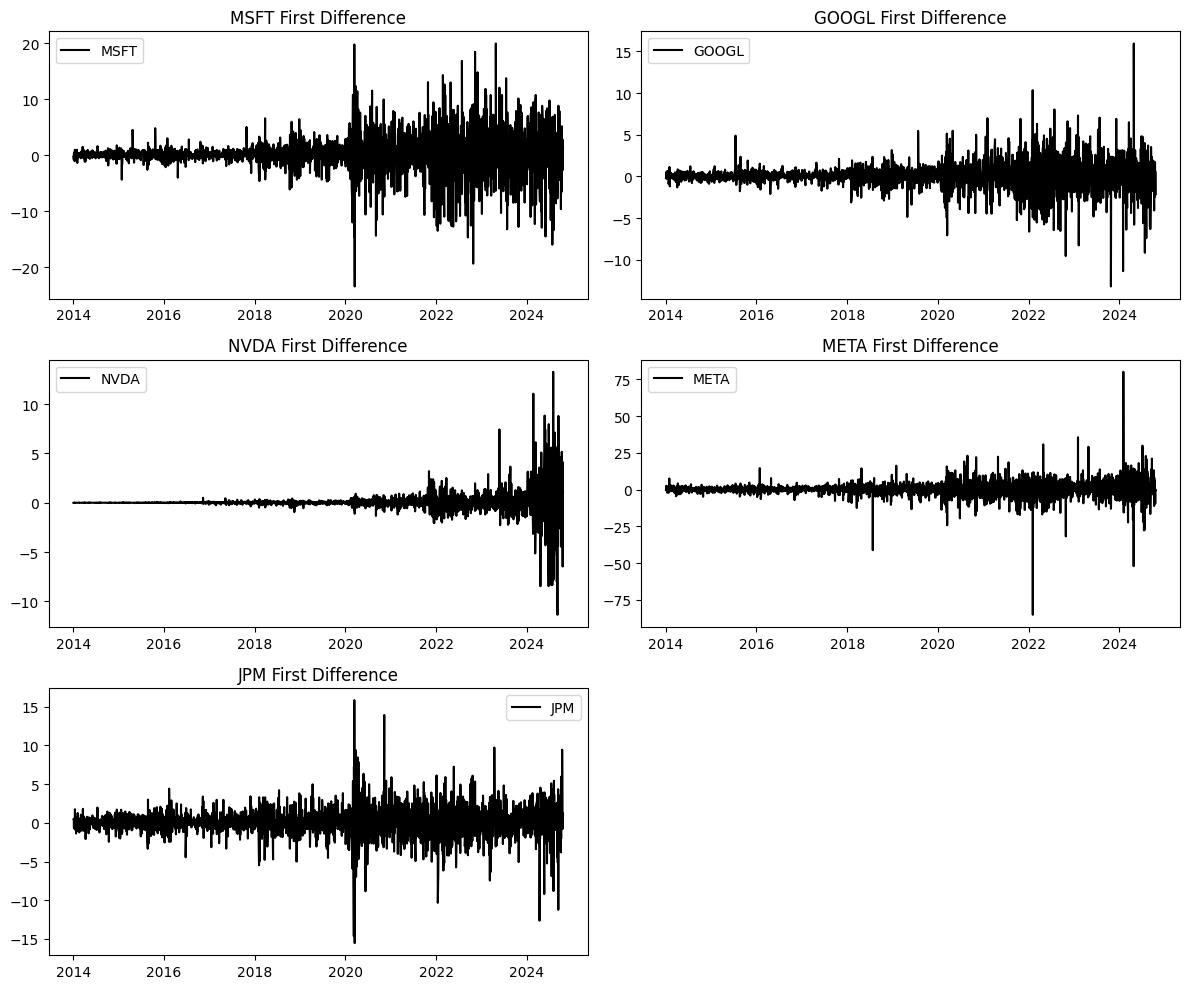

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

stocks:list[str] = ["MSFT", "GOOGL", "NVDA", "META", "JPM"]

for i, stock in enumerate(stocks):
    axes[i].plot(df_diff[stock], label=stock, color='black')
    axes[i].set_title(f'{stock} First Difference')
    axes[i].legend()

axes[-1].axis('off')

plt.tight_layout()
plt.show()

# **JOHANSEN COINTEGRATION TEST:**

In [ ]:
#Johansen Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM, select_coint_rank
import numpy as np

jres = coint_johansen(analysis_df, det_order=0, k_ar_diff=9)
Pi = jres.evec @ np.diag(jres.eig) @ np.linalg.inv(jres.evec)
jres = coint_johansen(analysis_df, det_order=0, k_ar_diff=9)
Pi = jres.evec @ np.diag(jres.eig) @ np.linalg.inv(jres.evec)
alpha = jres.lr1
beta = jres.evec

print("VECM Representation\n")
print("VECM: Δyt = Π yt-1 + Γ1 Δyt-1 + ... + ut")
print("\nEigenvalues (λ):")
print(jres.eig)

print("\nEstimated β (Cointegrating vectors):")
print(pd.DataFrame(jres.evec, index=analysis_df.columns, columns=[f'beta{i+1}' for i in range(jres.evec.shape[1])]))

print("\n=> Interpretation:")
print("Each column of β defines a potential long-run cointegrating relation among variables.")

rank = np.sum(jres.eig > 0)
print(f"\nNumber of non-zero eigenvalues (rank Π): {rank}")

#Computing the test-statistics

print("\n Johansen Cointegration Test Statistics")
print("Trace Statistics:")
print(jres.lr1)
print("Trace 5% Critical Values:")
print(jres.cvt[:, 1])

print("\nMax-Eigen Statistics:")
print(jres.lr2)
print("Max-Eigen 5% Critical Values:")
print(jres.cvm[:, 1])

for i in range(len(jres.lr1)):
    if jres.lr1[i] > jres.cvt[i, 1]:
        print(f"H0: r ≤ {i} rejected at 5% ⇒ At least {i+1} cointegrating vector(s)")
    else:
        print(f"H0: r ≤ {i} not rejected ⇒ {i} cointegrating relationship(s)")

#Adjustment coefficients and cointegrating vectors
vecm = VECM(analysis_df, k_ar_diff=1, coint_rank=1, deterministic="n")
vecm_fit = vecm.fit()

print("\n Estimated α (Adjustment Coefficients)")
print(pd.DataFrame(vecm_fit.alpha, index=analysis_df.columns, columns=["alpha"]))

print("\n Estimated β (Cointegrating Vector)")
print(pd.DataFrame(vecm_fit.beta, index=analysis_df.columns, columns=["beta"]))

VECM Representation

VECM: Δyt = Π yt-1 + Γ1 Δyt-1 + ... + ut

Eigenvalues (λ):
[1.11985418e-02 6.60524270e-03 5.05740062e-03 3.52273557e-03
 2.63048313e-05]

Estimated β (Cointegrating vectors):
          beta1     beta2     beta3     beta4     beta5
JPM    0.003857 -0.065093  0.031168 -0.033004  0.020138
MSFT  -0.037957 -0.010969  0.007225  0.009794 -0.024161
GOOGL  0.122979  0.052397 -0.046994 -0.015381  0.009210
META  -0.010774  0.022801  0.006168 -0.005136  0.004730
NVDA   0.002288 -0.035246 -0.057152  0.022765  0.042405

=> Interpretation:
Each column of β defines a potential long-run cointegrating relation among variables.

Number of non-zero eigenvalues (rank Π): 5

 Johansen Cointegration Test Statistics
Trace Statistics:
[7.18008981e+01 4.13041670e+01 2.33578343e+01 9.62764458e+00
 7.12344200e-02]
Trace 5% Critical Values:
[69.8189 47.8545 29.7961 15.4943  3.8415]

Max-Eigen Statistics:
[30.4967311  17.94633264 13.73018974  9.55641016  0.07123442]
Max-Eigen 5% Critical Values

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.




 Estimated α (Adjustment Coefficients)
          alpha
JPM    0.000476
MSFT   0.000590
GOOGL  0.000478
META   0.001515
NVDA   0.000484

 Estimated β (Cointegrating Vector)
            beta
JPM     1.000000
MSFT    5.514688
GOOGL -19.032394
META    2.337679
NVDA    0.615506
